# Machine Learning

Use pandas to read the dataset and convert it to a numpy array

In [1]:
import pandas as pd

data_test = pd.read_csv('dataset/mnist_test.csv')
data_train = pd.read_csv('dataset/mnist_train.csv')

In [2]:
import numpy as np

data_test = np.array(data_test).T
Y_test = data_test[0]
X_test = data_test[1:]
X_test = X_test / 255.

data_train = np.array(data_train).T
Y_train = data_train[0]
X_train = data_train[1:]
X_train = X_train / 255.

Let's instanciate the output size and the input size to give to my MLP

In [3]:
input_size = X_train.shape[0]
input_size

784

In [4]:
output_size = int(pd.DataFrame(Y_train).nunique().iloc[0])
output_size

10

Let's see a sample image

In [5]:
import matplotlib.pyplot as plt

def show_image(X, Y, index):
    current_image = X[:, index, None]
    label = Y[index]
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Label:  6


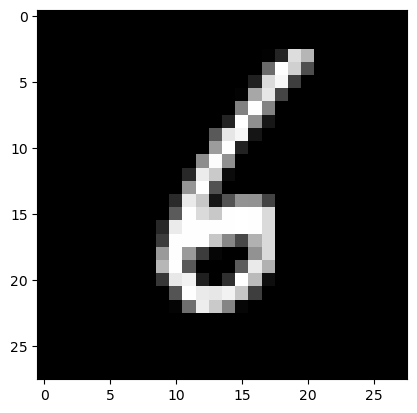

In [6]:
show_image(X_train, Y_train, np.random.randint(0, X_train.shape[1]-1))

***Custom MLP Explanation***

The simpler MLP we can create has the input, one hidden layer and one output layer. In this case, the input size will be 784 units corresponding to the 784 pixels in each 28x28 input image. 

The first hidden layer will have the same size as the input. The rest will depend on the number of hidden layers and the output size, with each subsequent hidden layer decreasing in size. 

And finally, our output layer will have 10 units corresponding to the ten digits with softmax activation.

You can have as many hidden layers as you want. Just change the atribute ***n_hidden_layers*** when instanciating the MLP. The minimum is *1* and there is virtually no limit.

But keep in mind, the higher the number, the longer it takes to train the model. And it's not always best for performance to increase this number as much as possible.

***How it works:***

<br/>

Z = Deactivated layer value

A = Activated layer value

W = Weights

b = Bias

X = input

Y = correct output values

m = X.shape[1] (number of training examples)

0 = first index

n = hidden layer indexes

-2 = index before last index

-1 = last index

<br/>

**Forward propagation**

$$Z^{[0]} = W^{[0]} X + b^{[0]}$$
$$A^{[0]} = {\text{ReLU}}(Z^{[0]})$$
<br/>
$$Z^{[n]} = W^{[n]} A^{[n-1]} + b^{[n]}$$
$$A^{[n]} = {\text{ReLU}}(Z^{[n]})$$
<br/>
$$Z^{[-1]} = W^{[-1]} A^{[-2]} + b^{[-1]}$$
$$A^{[-1]} = {\text{softmax}}(Z^{[-1]})$$

<br/>

**Backward propagation**

$$dZ^{[-1]} = A^{[-1]} - Y$$
$$dW^{[-1]} = \frac{1}{m} dZ^{[-1]} A^{[-2]T}$$
$$dB^{[-1]} = \frac{1}{m} \Sigma {dZ^{[-1]}}$$
<br/>
$$dZ^{[n]} = W^{[n+1]T} dZ^{[n+1]} .* g^{[n]\prime} (z^{[n]})$$
$$dW^{[n]} = \frac{1}{m} dZ^{[n]} A^{[n-1]T}$$
$$dB^{[n]} = \frac{1}{m} \Sigma {dZ^{[n]}}$$
<br/>
$$dZ^{[0]} = W^{[1]T} dZ^{[1]} .* g^{[0]\prime} (z^{[0]})$$
$$dW^{[0]} = \frac{1}{m} dZ^{[0]} X^{T}$$
$$dB^{[0]} = \frac{1}{m} \Sigma {dZ^{[0]}}$$

<br/>

**Parameter updates**

$$W^{[-1]} = W^{[2]} - \alpha dW^{[-1]}$$
$$b^{[-1]} = b^{[2]} - \alpha db^{[-1]}$$
<br/>
$$W^{[n]} = W^{[n]} - \alpha dW^{[n]}$$
$$b^{[n]} = b^{[n]} - \alpha db^{[n]}$$
<br/>
$$W^{[0]} = W^{[1]} - \alpha dW^{[0]}$$
$$b^{[0]} = b^{[1]} - \alpha db^{[0]}$$

<br/>
<br/>
<br/>

Finally, let's instanciate the MLP. Let's try from *1* to *3* hidden layers for *500* epochs.

In [7]:
args = {
    "n_hidden_layers": [1,2,3,4],
    "learning_rate": [0.1,0.2,0.4,0.6,0.8]
}

In [8]:
def get_accuracy(pred, Y):
    return np.sum(pred == Y) / Y.size

In [9]:
from MLP import MLP

def train_and_test():
    best_accuracy = 0
    best_n_hidden_layers = 0
    best_learning_rate = 0
    
    for n_hidden_layers in args["n_hidden_layers"]:
        for learning_rate in args["learning_rate"]:
            mlp = MLP(input_size=input_size,
                      output_size=output_size,
                      n_hidden_layers=n_hidden_layers,
                      learning_rate=learning_rate)
            mlp.train(X_train, Y_train,
                      epochs=1000,
                      verbose=False)
            
            accuracy = get_accuracy(mlp.predict(X_test),Y_test)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_n_hidden_layers = n_hidden_layers
                best_learning_rate = learning_rate
                
    print(f"Best number of hidden layers: {best_n_hidden_layers}")
    print(f"Best learning rate: {best_learning_rate}")
    return best_n_hidden_layers, best_learning_rate

In [10]:
final_n_hidden_layers, final_learning_rate = train_and_test()
final_mlp = MLP(input_size=input_size,
                output_size=output_size,
                n_hidden_layers=final_n_hidden_layers,
                learning_rate=final_learning_rate)
final_mlp.train(X_train, Y_train,epochs=1000,verbose=True)
predictions = final_mlp.predict(X_test)
print(f"Final accuracy: {get_accuracy(predictions,Y_test)}")

Best number of hidden layers: 3
Best learning rate: 0.6
Epoch: 0 | Accuracy: 0.1286
Epoch: 100 | Accuracy: 0.8067
Epoch: 200 | Accuracy: 0.8925
Epoch: 300 | Accuracy: 0.9146
Epoch: 400 | Accuracy: 0.9245
Epoch: 500 | Accuracy: 0.9342
Epoch: 600 | Accuracy: 0.9354
Epoch: 700 | Accuracy: 0.9446
Epoch: 800 | Accuracy: 0.9485
Epoch: 900 | Accuracy: 0.942
Epoch: 1000 | Accuracy: 0.9536
Final accuracy: 0.9429


We got a final accuracy of ~94% which is great!!

<br>

Let's check some individual examples:

In [11]:
def test_prediction(X, Y, prediction, index):
    print("Prediction: ", prediction[index])
    show_image(X, Y, index)

Prediction:  7
Label:  7


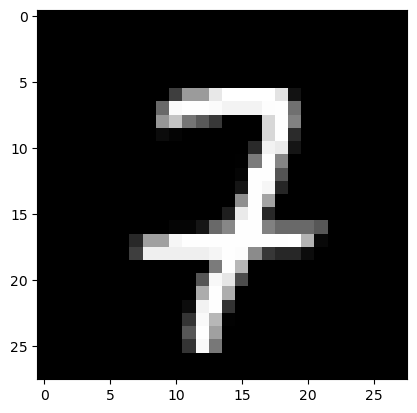

Prediction:  0
Label:  0


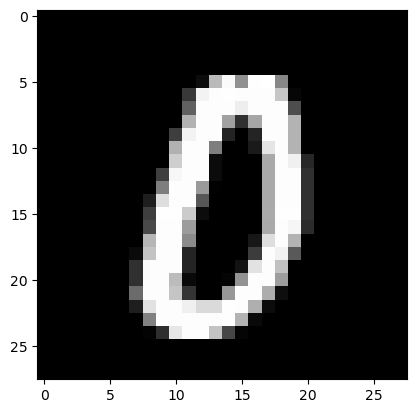

Prediction:  8
Label:  8


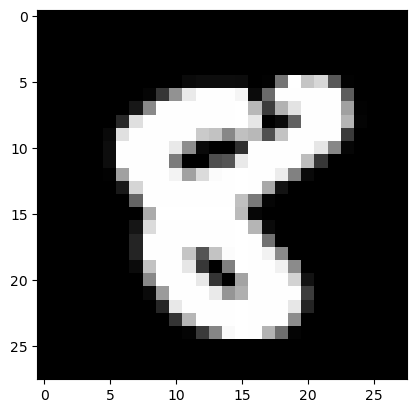

Prediction:  6
Label:  6


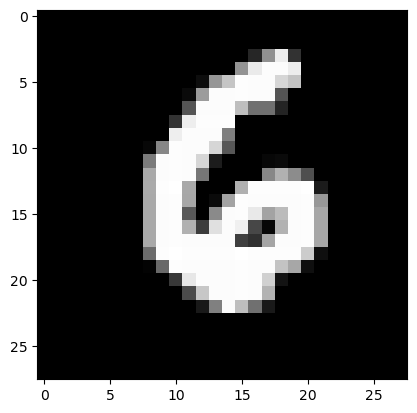

Prediction:  4
Label:  4


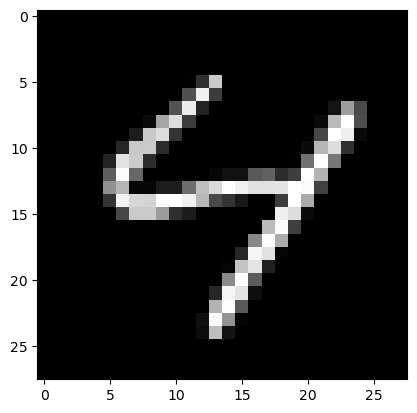

In [15]:
test_prediction(X_test, Y_test, predictions, index=np.random.randint(0, X_test.shape[1]-1))
test_prediction(X_test, Y_test, predictions, index=np.random.randint(0, X_test.shape[1]-1))
test_prediction(X_test, Y_test, predictions, index=np.random.randint(0, X_test.shape[1]-1))
test_prediction(X_test, Y_test, predictions, index=np.random.randint(0, X_test.shape[1]-1))
test_prediction(X_test, Y_test, predictions, index=np.random.randint(0, X_test.shape[1]-1))